# EDA - Air quality

Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required)** eventually affecting sensors concentration estimation capabilities. Missing values are tagged with -200 value.**

2.   Date	(DD/MM/YYYY)
1.   Time	(HH.MM.SS)
1.   True hourly averaged concentration CO in mg/m^3  (reference analyzer)
1.   PT08.S1 (tin oxide)  hourly averaged sensor response (nominally  CO targeted)
2.   True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
2.   True hourly averaged Benzene concentration  in microg/m^3 (reference analyzer)
2.   PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
1.   True hourly averaged NOx concentration  in ppb (reference analyzer)
1.   PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)
2.   True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
2.   PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)
1.   PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
1.   Temperature in Â°C
2.   Relative Humidity (%)
2.   AH Absolute Humidity



1.   present you exploratory data analysis.
2.   Estimate Relative Humidity (RH) behavior based on its answer to other parameters.


## Base Import

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px


In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
air_quality = fetch_ucirepo(id=360)

# data (as pandas dataframes)
df_originial = air_quality.data.features
#y = air_quality.data.targets

# metadata
#print(air_quality.metadata)

# variable information
#print(air_quality.variables)
df_originial.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


# present you exploratory data analysis.

### Basis analisys

In [ ]:
print("No of rows in dataset:",df_originial.shape[0])
print("No of columns in dataset:",df_originial.shape[1])

No of rows in dataset: 9357
No of columns in dataset: 15


In [ ]:
df_originial.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [ ]:
# getting the dtypes of the all columns
df_originial.dtypes

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)        int64
NMHC(GT)           int64
C6H6(GT)         float64
PT08.S2(NMHC)      int64
NOx(GT)            int64
PT08.S3(NOx)       int64
NO2(GT)            int64
PT08.S4(NO2)       int64
PT08.S5(O3)        int64
T                float64
RH               float64
AH               float64
dtype: object

In [ ]:
# getting the numerical estimates of all the numerical column
df_originial.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [ ]:
df_originial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


### Checking bad reading = -200

In [ ]:
df_originial[df_originial == -200].count()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [ ]:
# Seeing examples of badreading
df_originial[df_originial['T'] == -200]

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
524,4/1/2004,14:00:00,1.7,-200,222,-200.0,-200,99,-200,72,-200,-200,-200.0,-200.0,-200.0
525,4/1/2004,15:00:00,1.9,-200,197,-200.0,-200,108,-200,81,-200,-200,-200.0,-200.0,-200.0
526,4/1/2004,16:00:00,2.3,-200,319,-200.0,-200,131,-200,93,-200,-200,-200.0,-200.0,-200.0
701,4/8/2004,23:00:00,2.0,-200,137,-200.0,-200,129,-200,106,-200,-200,-200.0,-200.0,-200.0
702,4/9/2004,0:00:00,2.4,-200,189,-200.0,-200,154,-200,109,-200,-200,-200.0,-200.0,-200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8111,2/11/2005,17:00:00,6.6,-200,-200,-200.0,-200,1227,-200,326,-200,-200,-200.0,-200.0,-200.0
8112,2/11/2005,18:00:00,6.5,-200,-200,-200.0,-200,1061,-200,284,-200,-200,-200.0,-200.0,-200.0
8113,2/11/2005,19:00:00,7.1,-200,-200,-200.0,-200,1075,-200,289,-200,-200,-200.0,-200.0,-200.0
8114,2/11/2005,20:00:00,4.9,-200,-200,-200.0,-200,641,-200,215,-200,-200,-200.0,-200.0,-200.0


In [ ]:
#Replacindo badreading (-200) to nan
df_originial.replace(to_replace=-200,value=np.nan,inplace=True)
df_originial.isna().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

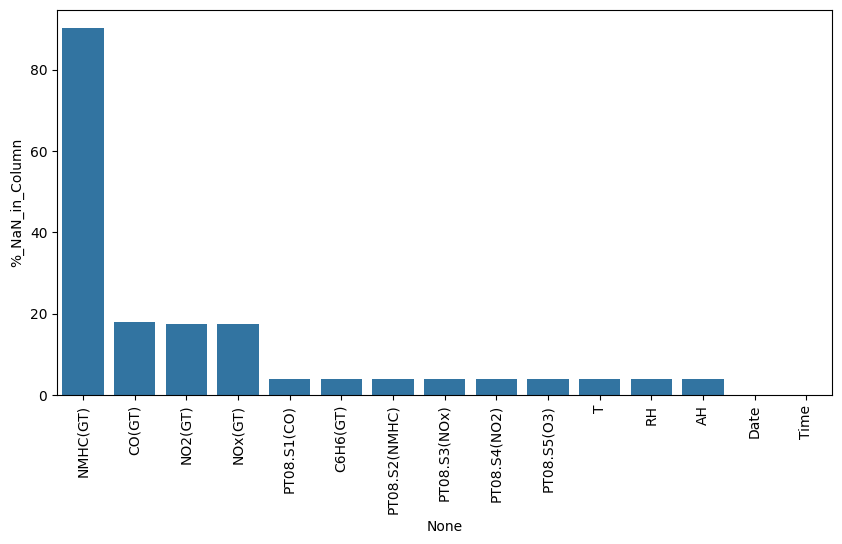

In [ ]:
percent_NaN = []
columns = df_originial.columns
for col in columns:
    pNaN =  (df_originial[col].isna().sum()/df_originial.shape[0]) * 100 #sum NaN instances in each column. Divide by total rows
    percent_NaN.append(pNaN)
nan_percent_df = pd.DataFrame(percent_NaN,
                              index=columns,
                              columns=['%_NaN_in_Column']).sort_values('%_NaN_in_Column',ascending = False)
#nan_percent_df

plt.figure(figsize=(10, 5))
sns.barplot(x = nan_percent_df.index, y = nan_percent_df['%_NaN_in_Column'])
plt.xticks(rotation=90)
plt.show()



I chose to remove the column with + 80% of null values, which is the NMHC Non Metanic HydroCarbons column, but there are columns that have benzene and hydrocarbon readings

### Creating a cleaned DF
Removing column nmhc(gt), nan values and verifying outliers

In [ ]:
df_cleaned = df_originial.copy()
len(df_cleaned)

9357

In [ ]:
#df_cleaned = df_cleaned.drop('NMHC(GT)', axis=1, inplace=True, errors = 'ignore')
df_cleaned.drop('NMHC(GT)', axis=1, inplace=True)
df_cleaned = df_cleaned.dropna()
print(df_cleaned.isna().sum())
print(len(df_cleaned))
#print(df_cleaned.head())

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64
6941


In [ ]:
df_cleaned.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000
mean,2.182467,1119.913269,10.554488,958.543005,250.671949,816.893387,113.874082,1452.648898,1057.756519,17.755323,48.881905,0.985573
std,1.441158,218.733754,7.465226,264.055002,208.611371,251.897200,47.475017,353.301576,406.509957,8.844909,17.433193,0.401097
min,0.100000,647.000000,0.200000,390.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,1.100000,956.000000,4.900000,760.000000,103.000000,642.000000,79.000000,1207.000000,760.000000,11.200000,35.300000,0.694100
50%,1.900000,1085.000000,8.800000,931.000000,186.000000,786.000000,110.000000,1457.000000,1006.000000,16.800000,49.200000,0.953900
75%,2.900000,1254.000000,14.600000,1135.000000,335.000000,947.000000,142.000000,1683.000000,1322.000000,23.700000,62.200000,1.251600
max,11.900000,2040.000000,63.700000,2214.000000,1479.000000,2683.000000,333.000000,2775.000000,2523.000000,44.600000,88.700000,2.180600


CO(GT) (Carbon Monoxide Concentration):

Average Exposure Limit (AEL): 10 mg/m³ (8-hour average) and 30 mg/m³ (1-hour average) by the United States Environmental Protection Agency (EPA).
Average Exposure Limit (AEL): 10 mg/m³ (8-hour average) by the European Union.
PT08.S1(CO) (Sensor Output Signal for CO):

There are no specific limits for this parameter as it is an indirect measure of CO concentration.
NMHC(GT) (Non-Methane Hydrocarbons Concentration):

There are no specific limits for this parameter, but non-methane hydrocarbons include a variety of volatile organic compounds (VOCs) considered atmospheric pollutants.
C6H6(GT) (Benzene Concentration):

Annual Average Limit Value: 5 µg/m³ by the European Union.
Short-Term Exposure Limit: 10 µg/m³ (1-hour average) by the European Union.
PT08.S2(NMHC) (Sensor Output Signal for NMHC):

There are no specific limits for this parameter as it is an indirect measure of NMHC concentration.
NOx(GT) (Nitrogen Oxides Concentration):

Hourly Limit Value: 200 µg/m³ (1-hour average) by the European Union.
Annual Limit Value: 40 µg/m³ by the European Union.
PT08.S3(NOx) (Sensor Output Signal for NOx):

There are no specific limits for this parameter as it is an indirect measure of NOx concentration.
NO2(GT) (Nitrogen Dioxide Concentration):

Hourly Limit Value: 200 µg/m³ (1-hour average) by the European Union.
Annual Limit Value: 40 µg/m³ by the European Union.
PT08.S4(NO2) (Sensor Output Signal for NO2):

There are no specific limits for this parameter as it is an indirect measure of NO2 concentration.
PT08.S5(O3) (Sensor Output Signal for O3):

There are no specific limits for this parameter as it is an indirect measure of O3 concentration.

In [ ]:
columns_numeric = ['CO(GT)', 'PT08.S1(CO)',
       'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)',
       'PT08.S4(NO2)', 'PT08.S5(O3)']

# Loop sobre cada coluna para criar um boxplot
plt.figure(figsize=(10, 6))
for col in columns_numeric:
    plt.subplot(3, 3, columns_numeric.index(col) + 1)
    plt.boxplot(df_cleaned[col].dropna(), vert=False)
    plt.title(col)
    plt.xlabel('Value')
plt.tight_layout()
plt.show()

In [ ]:
def calcular_porcentagem_outliers(dataframe, column):
    # Calculando o primeiro e terceiro quartil
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)

    # Calculando o intervalo interquartil (IQR)
    IQR = Q3 - Q1

    # Calculando os limites superior e inferior para identificar outliers
    limite_superior = Q3 + 1.5 * IQR
    limite_inferior = Q1 - 1.5 * IQR

    # Identificando outliers na coluna
    outliers_acima = dataframe[dataframe[column] > limite_superior][column]
    outliers_abaixo = dataframe[dataframe[column] < limite_inferior][column]

    # Calculando a porcentagem de outliers em relação ao total de dados
    porcentagem_outliers_acima = (len(outliers_acima) / len(dataframe)) * 100
    porcentagem_outliers_abaixo = (len(outliers_abaixo) / len(dataframe)) * 100

    return porcentagem_outliers_acima, porcentagem_outliers_abaixo

# Lista das colunas numéricas
columns_numeric = ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)']

# Calculando a porcentagem de outliers para cada coluna
for col in columns_numeric:
    outliers_acima, outliers_abaixo = calcular_porcentagem_outliers(df_cleaned, col)
    print(f"Coluna: {col}")
    print(f"Porcentagem de outliers acima do terceiro quartil: {outliers_acima:.2f}%")
    print(f"Porcentagem de outliers abaixo do primeiro quartil: {outliers_abaixo:.2f}%")
    print()


### Fixing date / time

In [ ]:
import datetime
df_cleaned['DateTime'] =  (df_cleaned.Date) + ' ' + (df_cleaned.Time)
df_cleaned.DateTime = df_cleaned.DateTime.apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%Y %H:%M:%S'))
#df_cleaned['DateTime'] = df_cleaned.DateTime.apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y %H:%M:%S'))
df_cleaned

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime
0,3/10/2004,18:00:00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004-03-10 18:00:00
1,3/10/2004,19:00:00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004-03-10 19:00:00
2,3/10/2004,20:00:00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004-03-10 20:00:00
3,3/10/2004,21:00:00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004-03-10 21:00:00
4,3/10/2004,22:00:00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004-03-10 22:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,4/4/2005,10:00:00,3.1,1314.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568,2005-04-04 10:00:00
9353,4/4/2005,11:00:00,2.4,1163.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,2005-04-04 11:00:00
9354,4/4/2005,12:00:00,2.4,1142.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,2005-04-04 12:00:00
9355,4/4/2005,13:00:00,2.1,1003.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139,2005-04-04 13:00:00


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6941 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           6941 non-null   object        
 1   Time           6941 non-null   object        
 2   CO(GT)         6941 non-null   float64       
 3   PT08.S1(CO)    6941 non-null   float64       
 4   C6H6(GT)       6941 non-null   float64       
 5   PT08.S2(NMHC)  6941 non-null   float64       
 6   NOx(GT)        6941 non-null   float64       
 7   PT08.S3(NOx)   6941 non-null   float64       
 8   NO2(GT)        6941 non-null   float64       
 9   PT08.S4(NO2)   6941 non-null   float64       
 10  PT08.S5(O3)    6941 non-null   float64       
 11  T              6941 non-null   float64       
 12  RH             6941 non-null   float64       
 13  AH             6941 non-null   float64       
 14  DateTime       6941 non-null   datetime64[ns]
dtypes: datetime64[ns](1),

In [ ]:
df_cleaned['Weekday'] = df_cleaned['DateTime'].dt.day_name()
df_cleaned['Month']   = df_cleaned['DateTime'].dt.month_name()
df_cleaned['Hour']    = df_cleaned['DateTime'].dt.hour
df_cleaned['Date']    = pd.to_datetime(df_cleaned['Date'], format='%m/%d/%Y')
df_cleaned.drop('Time', axis=1, inplace=True, errors = 'ignore')
df_cleaned.head()

,Date,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime,Weekday,Month,Hour
0,2004-03-10,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004-03-10 18:00:00,Wednesday,March,18
1,2004-03-10,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004-03-10 19:00:00,Wednesday,March,19
2,2004-03-10,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004-03-10 20:00:00,Wednesday,March,20
3,2004-03-10,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004-03-10 21:00:00,Wednesday,March,21
4,2004-03-10,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004-03-10 22:00:00,Wednesday,March,22


Bringing Date - Month - Weekday to front

In [ ]:
df_cleaned = df_cleaned[['Date','Month', 'Weekday','DateTime', 'Hour', 'CO(GT)','PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)',
         'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']]
print(len(df_cleaned))

df_cleaned.head()

6941


,Date,Month,Weekday,DateTime,Hour,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,March,Wednesday,2004-03-10 18:00:00,18,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10,March,Wednesday,2004-03-10 19:00:00,19,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10,March,Wednesday,2004-03-10 20:00:00,20,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10,March,Wednesday,2004-03-10 21:00:00,21,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10,March,Wednesday,2004-03-10 22:00:00,22,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


### undestaind fields pars

*   C6H6(GT): Concentração de benzeno no ar.
*   PT08.S2(NMHC): Sinal de saída de um sensor para compostos orgânicos não metânicos (NMHC)
*   NOx(GT): Concentração de óxidos de nitrogênio no ar.
*   PT08.S3(NOx): Sinal de saída de um sensor para óxidos de nitrogênio.
*   NO2(GT): Concentração de dióxido de nitrogênio no ar.
*   PT08.S4(NO2): Sinal de saída de um sensor para dióxido de nitrogênio.
*   PT08.S5(O3): Sinal de saída de um sensor para ozônio.

---

*   PT08.S2(NMHC) em relação a C6H6(GT).
*   PT08.S3(NOx) em relação a NOx(GT).
*   PT08.S4(NO2) em relação a NO2(GT).
*   PT08.S5(O3) em relação a PT08.S5(O3).



<ipython-input-20-a2a52bacbd12>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_cleaned.corr()


<Axes: >

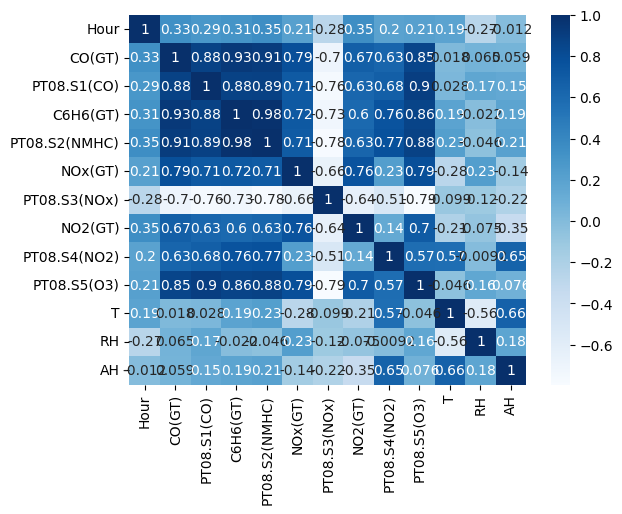

In [ ]:
import seaborn as sb
corr = df_cleaned.corr()
sb.heatmap(corr, cmap="Blues", annot=True)

### Ploting, temperatures - WeekDays vs CO - Time vs CO - Months vs CO

trying to see if there is any correlation between temperature vs C0

In [ ]:
def analisys_vs_co(time_column, variable_to_be_sum):
  df = df_cleaned.groupby(time_column)[variable_to_be_sum].sum()
  df.reset_index()
  df = pd.DataFrame({time_column:df.index, variable_to_be_sum:df.values})
  return df.sort_values(variable_to_be_sum, ascending = False)

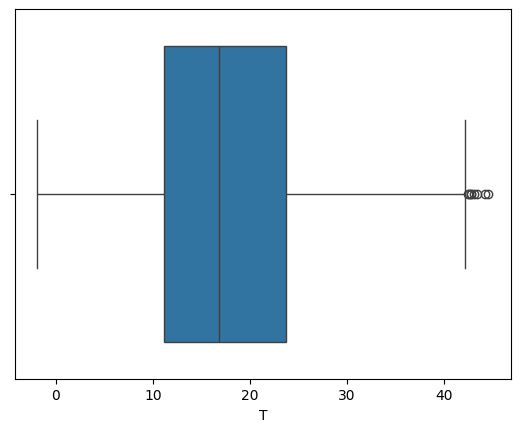

In [ ]:
# prompt: faca um box plot com a df_cleaned['T'] na horizontal

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df_cleaned['T'], orient="h")
plt.show()


Verificando os outliers da temperatura

In [ ]:
df_cleaned[df_cleaned['T'] > 40].head()

,Date,Month,Weekday,DateTime,Hour,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
2180,2004-06-09,June,Wednesday,2004-06-09 14:00:00,14,2.3,1078.0,14.0,1116.0,157.0,815.0,137.0,1761.0,1013.0,40.6,15.3,1.1485
2181,2004-06-09,June,Wednesday,2004-06-09 15:00:00,15,1.8,1076.0,10.9,1012.0,113.0,894.0,116.0,1665.0,816.0,40.3,16.1,1.1896
2182,2004-06-09,June,Wednesday,2004-06-09 16:00:00,16,2.0,1052.0,11.1,1019.0,140.0,896.0,125.0,1610.0,836.0,40.3,14.2,1.0494
2205,2004-06-10,June,Thursday,2004-06-10 15:00:00,15,2.3,1142.0,13.8,1109.0,140.0,782.0,133.0,1789.0,1047.0,40.4,17.2,1.2774
2612,2004-06-27,June,Sunday,2004-06-27 14:00:00,14,0.7,841.0,4.0,712.0,38.0,1175.0,50.0,1339.0,476.0,41.3,12.8,0.9933


In [ ]:
analisys_vs_co('Month', 'T')

,Month,T
7,March,16465.7
5,July,15771.5
6,June,15483.2
1,August,12201.9
8,May,11914.6
11,September,10430.0
0,April,9011.5
9,November,8775.6
10,October,7926.3
2,December,6123.4


In [ ]:
analisys_vs_co('Month', 'CO(GT)')

,Month,CO(GT)
7,March,2573.1
9,November,1761.2
2,December,1413.6
4,January,1271.9
0,April,1164.5
3,February,1133.0
8,May,1130.5
6,June,1122.3
10,October,1050.0
11,September,1027.5


In [ ]:
import plotly.express as px

#fig = px.bar(df_cleaned, x=analisys_vs_co('Month')['Month'], y=df_month_analisys["CO(GT)"],
fig = px.bar(df_cleaned, x=analisys_vs_co('Month', 'CO(GT)')['Month'], y=analisys_vs_co('Month', 'CO(GT)')["CO(GT)"],
             title="Month vs CO(gt)",
             labels={"Month": "Month", "CO(GT)": "CO(gt)"},
             color_discrete_sequence=px.colors.qualitative.Pastel1)

fig.update_layout(
    title="Month vs CO(gt)",
    xaxis_title="Month",
    yaxis_title="CO(gt)",
)

fig.show()


In [ ]:
analisys_vs_co('Weekday', 'CO(GT)')['CO(GT)'].mean()

2164.0714285714284

In [ ]:
fig = px.bar(df_cleaned, analisys_vs_co('Weekday', 'CO(GT)')['Weekday'], y=analisys_vs_co('Weekday', 'CO(GT)')["CO(GT)"],
             title="Weekday vs CO(gt)",
             labels={"Weekday": "Weekday", "CO(GT)": "CO(gt)"},
             color_discrete_sequence=px.colors.qualitative.Pastel1)

fig.update_layout(
    title="Weekday vs CO(gt)",
    xaxis_title="Weekday",
    yaxis_title="CO(gt)",
)

fig.show()

In [ ]:
analisys_vs_co('Hour', 'CO(GT)')

,Hour,CO(GT)
19,19,1142.3
20,20,1071.7
18,18,1058.8
9,9,912.6
8,8,857.0
17,17,855.3
21,21,800.0
10,10,794.6
16,16,691.3
11,11,689.7


In [ ]:
fig = px.bar(df_cleaned, analisys_vs_co('Hour', 'CO(GT)')['Hour'], y=analisys_vs_co('Hour', 'CO(GT)')["CO(GT)"],
             title="Hour vs CO(gt)",
             labels={"Hour": "Hour", "CO(GT)": "CO(gt)"},
             color_discrete_sequence=px.colors.qualitative.Pastel1)

fig.update_layout(
    title="Hour vs CO(gt)",
    xaxis_title="Hour",
    yaxis_title="CO(gt)",
)

fig.show()

# Estimate Relative Humidity (RH) behavior based on its answer to other parameters.


Análise de Correlação

The Pearson correlation coefficient (r) is used to measure the linear correlation between two quantitative variables. It is calculated as the covariance of the two variables divided by the product of the standard deviation of each variable. The formula is:

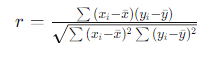


### Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict

#Different Regressors for ML model
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel , RBF
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

### Making plot corr analises

In [ ]:
# Calcular a matriz de correlação para os parâmetros disponíveis, focando na umidade relativa (RH)
correlation_matrix = df_cleaned.corr()

# Exibir a correlação de 'RH' com outros parâmetros
rh_correlation = correlation_matrix['RH'].sort_values(ascending=False)
rh_correlation


<ipython-input-34-9967041247ae>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



RH               1.000000
NOx(GT)          0.232255
AH               0.179576
PT08.S1(CO)      0.169234
PT08.S5(O3)      0.164821
CO(GT)           0.064753
PT08.S4(NO2)    -0.009160
C6H6(GT)        -0.021592
PT08.S2(NMHC)   -0.046084
NO2(GT)         -0.075333
PT08.S3(NOx)    -0.116479
Hour            -0.266642
T               -0.563909
Name: RH, dtype: float64

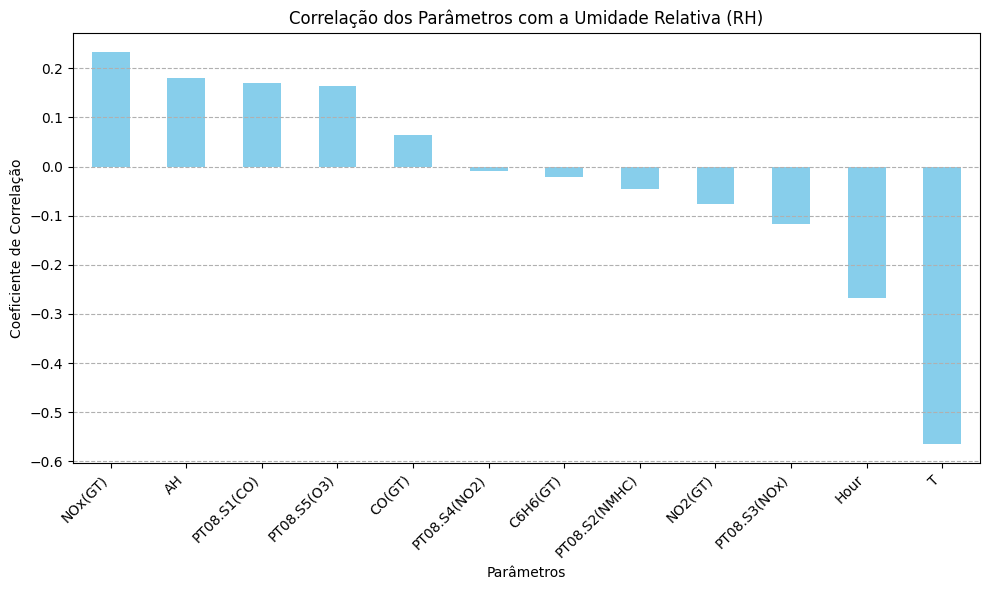

In [ ]:
import matplotlib.pyplot as plt

rh_correlation_no_self = rh_correlation.drop('RH')

# Plotando o gráfico de barras das correlações
plt.figure(figsize=(10, 6))
rh_correlation_no_self.plot(kind='bar', color='skyblue')
plt.title('Correlação dos Parâmetros com a Umidade Relativa (RH)')
plt.xlabel('Parâmetros')
plt.ylabel('Coeficiente de Correlação')
plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Mostrar o gráfico
plt.show()


### Models

In [ ]:
#Initiate Different Regressors for ML model
lr = LinearRegression()
hr = HuberRegressor(epsilon=1.15, max_iter=1000)
rf = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42)
gb = GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=42)
gp = GaussianProcessRegressor(kernel = DotProduct() + WhiteKernel(), random_state=42)
kn = KNeighborsRegressor()
ab = AdaBoostRegressor()
sv = SVR()
dt = DecisionTreeRegressor(max_features = 'auto', max_depth=3, random_state=42)
nn = MLPRegressor(hidden_layer_sizes = 500, solver='adam', learning_rate_init = 1e-2,max_iter=500)

models =  [(lr,'Linear Regression'),
           (hr,'Huber Regression'),
           (rf,'Random Forest'),
           (gb,'Gradient Boosting'),
           (gp,'Gaussian Process'),
           (kn,'K-Neighbors'),
           (ab,'Ada Boost'),
           (sv,'SVR'),
           (dt,'Decision Tree'),
           (nn,'MLP')]

### First with outliers

In [ ]:
select_columns = ['Hour', 'CO(GT)', 'PT08.S1(CO)',
       'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)',
       'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'AH']

X_second_part_outlier = df_cleaned[select_columns]
y_second_part_outlier = df_cleaned['RH']

print('Tamanho x {}'.format(len(X_second_part_outlier)))

Tamanho x 6941


In [ ]:
# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_second_part_outlier, y_second_part_outlier, test_size=0.2, random_state=42)

In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

results = pd.DataFrame()

# Loop para calcular os resultados para cada modelo
for i in range(10):
    models[i][0].fit(X_train, y_train)
    y_train_pred = models[i][0].predict(X_train)
    y_test_pred = models[i][0].predict(X_test)

    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Criando um DataFrame temporário com os resultados
    resultados = pd.DataFrame({'Method': [models[i][1]], 'Training MSE': [train_mse], 'Training R2': [train_r2], 'Test MSE': [test_mse], 'Test R2': [test_r2]})

    # Concatenando os resultados ao DataFrame results
    results = pd.concat([results, resultados], ignore_index=True)

# Exibindo os resultados
print(results)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.



              Method  Training MSE  Training R2    Test MSE   Test R2
0  Linear Regression     36.374550     0.879725   34.080248  0.889936
1   Huber Regression     38.935391     0.871258   35.434060  0.885564
2      Random Forest     97.705572     0.676931  102.727439  0.668237
3  Gradient Boosting      2.951906     0.990239    3.458273  0.988831
4   Gaussian Process     37.591669     0.875701   35.520956  0.885283
5        K-Neighbors     64.184545     0.787770   96.915838  0.687006
6          Ada Boost     42.566290     0.859252   46.234210  0.850684
7                SVR    193.345707     0.360691  195.634082  0.368190
8      Decision Tree    110.316721     0.635231  116.418195  0.624022
9                MLP     20.647977     0.931726   20.550105  0.933632


In [ ]:
results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,36.374550,0.879725,34.080248,0.889936
1,Huber Regression,38.935391,0.871258,35.434060,0.885564
2,Random Forest,97.705572,0.676931,102.727439,0.668237
3,Gradient Boosting,2.951906,0.990239,3.458273,0.988831
4,Gaussian Process,37.591669,0.875701,35.520956,0.885283
5,K-Neighbors,64.184545,0.787770,96.915838,0.687006
6,Ada Boost,36.187602,0.880344,39.166687,0.873509
7,SVR,193.345707,0.360691,195.634082,0.368190
8,Decision Tree,110.316721,0.635231,116.418195,0.624022
9,MLP,68.065265,0.774938,67.539955,0.781877


In [ ]:
results_sorted = results.sort_values(by='Test R2', ascending=False)

# Exibir os melhores valores ordenados
print(results_sorted)

              Method  Training MSE  Training R2    Test MSE   Test R2
3  Gradient Boosting      2.951906     0.990239    3.458273  0.988831
0  Linear Regression     36.374550     0.879725   34.080248  0.889936
1   Huber Regression     38.935391     0.871258   35.434060  0.885564
4   Gaussian Process     37.591669     0.875701   35.520956  0.885283
6          Ada Boost     36.187602     0.880344   39.166687  0.873509
9                MLP     68.065265     0.774938   67.539955  0.781877
5        K-Neighbors     64.184545     0.787770   96.915838  0.687006
2      Random Forest     97.705572     0.676931  102.727439  0.668237
8      Decision Tree    110.316721     0.635231  116.418195  0.624022
7                SVR    193.345707     0.360691  195.634082  0.368190


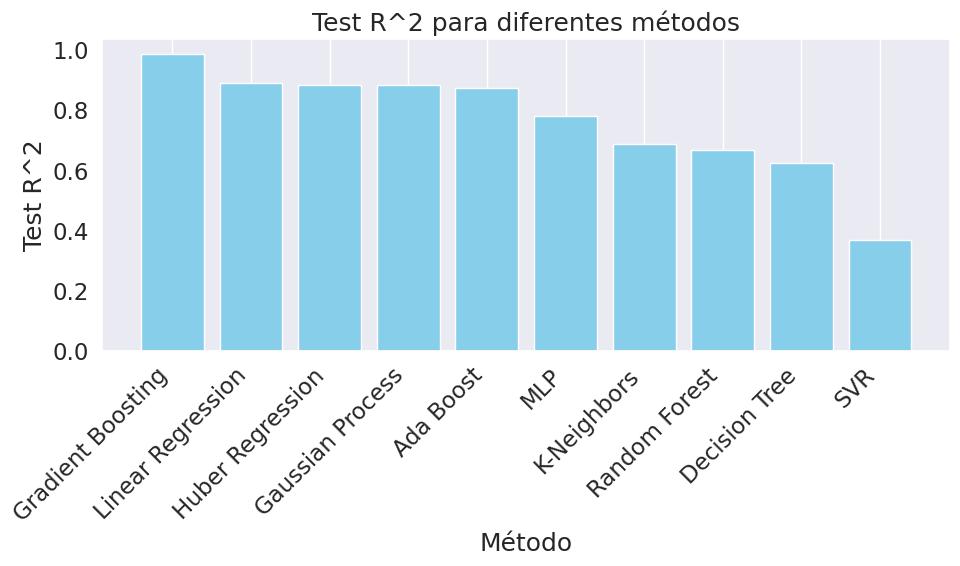

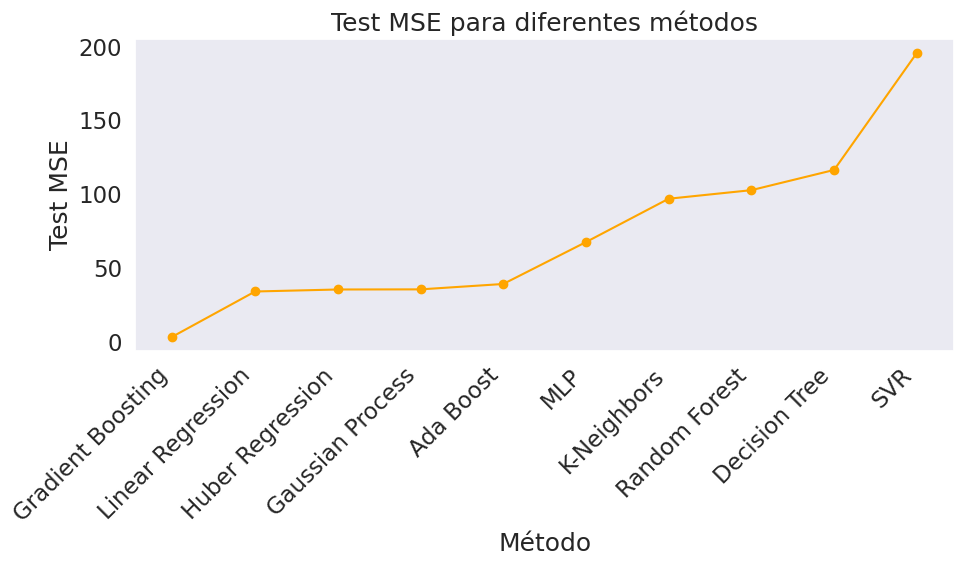

In [ ]:
df = pd.DataFrame(results_sorted)

# Ordenar os dados pelo Test R2
df_sorted = df.sort_values(by='Test R2', ascending=False)

# Criar o gráfico de barras (barplot) para o Test R2
plt.figure(figsize=(10, 6))
plt.bar(df_sorted['Method'], df_sorted['Test R2'], color='skyblue')
plt.xlabel('Método')
plt.ylabel('Test R^2')
plt.title('Test R^2 para diferentes métodos')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

# Exibir o gráfico de barras
plt.tight_layout()
plt.show()

# Criar o gráfico de linha (line plot) para o Test MSE
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['Method'], df_sorted['Test MSE'], marker='o', color='orange')
plt.xlabel('Método')
plt.ylabel('Test MSE')
plt.title('Test MSE para diferentes métodos')
plt.xticks(rotation=45, ha='right')
plt.grid()

# Exibir o gráfico de linha
plt.tight_layout()
plt.show()

### Removendo os outliers

In [ ]:
#Removing Outliers with the Interquartile Range Method (IQR)
Q1 = df_cleaned.quantile(0.25) #first 25% of the data
Q3 = df_cleaned.quantile(0.75) #first 75% of the data
IQR = Q3 - Q1 #IQR = InterQuartile Range

scale = 1.4 #May need to play with this value to modify outlier detection sensitivity if need be
lower_lim = Q1 - scale*IQR
upper_lim = Q3 + scale*IQR

cols = df_cleaned.columns[5:] # Look for oulierts in columns starting from CO(GT)

#Mask a masking condition that removes rows that have values above/below IQR limits
condition = ~((df_cleaned[cols] < lower_lim) | (df_cleaned[cols] > upper_lim)).any(axis=1)

#Generate new dataframe that has had its outliers removed
df_cleanead_without_outliers = df_cleaned[condition]
df_cleanead_without_outliers.head()

<ipython-input-403-d7d638d21160>:2: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-403-d7d638d21160>:3: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-403-d7d638d21160>:13: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`



,Date,Month,Weekday,DateTime,Hour,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,March,Wednesday,2004-03-10 18:00:00,18,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10,March,Wednesday,2004-03-10 19:00:00,19,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10,March,Wednesday,2004-03-10 20:00:00,20,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10,March,Wednesday,2004-03-10 21:00:00,21,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10,March,Wednesday,2004-03-10 22:00:00,22,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [ ]:
X_second_part_without_outlier = df_cleanead_without_outliers[select_columns]
y_second_part_without_outlier = df_cleanead_without_outliers['RH']

print('Tamanho x {}'.format(len(X_second_part_without_outlier)))

Tamanho x 6099


In [ ]:
# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_second_part_without_outlier, y_second_part_without_outlier, test_size=0.2, random_state=42)

In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

results = pd.DataFrame()

# Loop para calcular os resultados para cada modelo
for i in range(10):
    models[i][0].fit(X_train, y_train)
    y_train_pred = models[i][0].predict(X_train)
    y_test_pred = models[i][0].predict(X_test)

    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Criando um DataFrame temporário com os resultados
    resultados = pd.DataFrame({'Method': [models[i][1]], 'Training MSE': [train_mse], 'Training R2': [train_r2], 'Test MSE': [test_mse], 'Test R2': [test_r2]})

    # Concatenando os resultados ao DataFrame results
    results = pd.concat([results, resultados], ignore_index=True)

# Exibindo os resultados
print(results)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.



              Method  Training MSE  Training R2    Test MSE   Test R2
0  Linear Regression     33.839091     0.889745   31.831988  0.890027
1   Huber Regression     39.870559     0.870094   37.697269  0.869763
2      Random Forest     99.762547     0.674953  101.698491  0.648651
3  Gradient Boosting      3.025345     0.990143    3.869986  0.986630
4   Gaussian Process     35.152506     0.885466   32.920851  0.886265
5        K-Neighbors     62.771240     0.795478   96.954307  0.665042
6          Ada Boost     35.994745     0.882722   37.975108  0.868803
7                SVR    197.237813     0.357359  184.398454  0.362939
8      Decision Tree    112.437955     0.633654  117.110192  0.595407
9                MLP     21.689596     0.929331   22.210800  0.923266


In [ ]:
results_sorted = results.sort_values(by='Test R2', ascending=False)

# Exibir os melhores valores ordenados
print(results_sorted)

              Method  Training MSE  Training R2    Test MSE   Test R2
3  Gradient Boosting      3.025345     0.990143    3.869986  0.986630
9                MLP     21.689596     0.929331   22.210800  0.923266
0  Linear Regression     33.839091     0.889745   31.831988  0.890027
4   Gaussian Process     35.152506     0.885466   32.920851  0.886265
1   Huber Regression     39.870559     0.870094   37.697269  0.869763
6          Ada Boost     35.994745     0.882722   37.975108  0.868803
5        K-Neighbors     62.771240     0.795478   96.954307  0.665042
2      Random Forest     99.762547     0.674953  101.698491  0.648651
8      Decision Tree    112.437955     0.633654  117.110192  0.595407
7                SVR    197.237813     0.357359  184.398454  0.362939


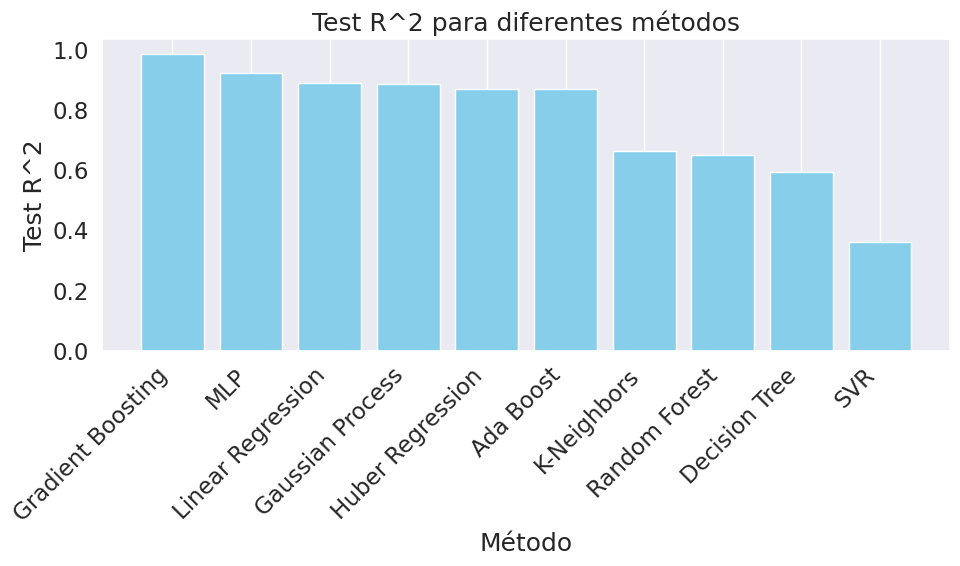

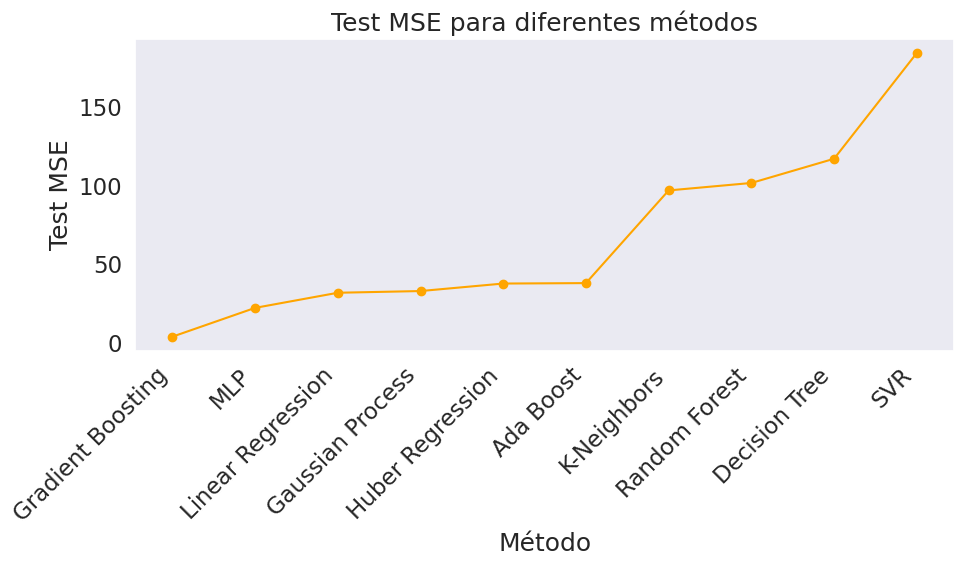

In [ ]:
df = pd.DataFrame(results_sorted)

# Ordenar os dados pelo Test R2
df_sorted = df.sort_values(by='Test R2', ascending=False)

# Criar o gráfico de barras (barplot) para o Test R2
plt.figure(figsize=(10, 6))
plt.bar(df_sorted['Method'], df_sorted['Test R2'], color='skyblue')
plt.xlabel('Método')
plt.ylabel('Test R^2')
plt.title('Test R^2 para diferentes métodos')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

# Exibir o gráfico de barras
plt.tight_layout()
plt.show()

# Criar o gráfico de linha (line plot) para o Test MSE
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['Method'], df_sorted['Test MSE'], marker='o', color='orange')
plt.xlabel('Método')
plt.ylabel('Test MSE')
plt.title('Test MSE para diferentes métodos')
plt.xticks(rotation=45, ha='right')
plt.grid()

# Exibir o gráfico de linha
plt.tight_layout()
plt.show()